In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error

In [88]:
file_path = "/Users/kc07/Desktop/CED 6910/ALY 6110/For_Hire_Vehicles__FHV__-_Active_20250130.csv"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"Dataset file not found at {file_path}. Please verify the file path.")

df = pd.read_csv(file_path)

df['Wheelchair Accessible'] = df['Wheelchair Accessible'].notna().astype(int)

class_counts = df['Wheelchair Accessible'].value_counts()
print("Class distribution:")
print(class_counts)

features = ['Vehicle Year']

df = df.dropna(subset=features)

Class distribution:
Wheelchair Accessible
0    99114
1     8129
Name: count, dtype: int64


In [89]:

X = df[features]
y = df['Wheelchair Accessible']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LogisticRegression(penalty='l1', solver='liblinear', C=1.0, class_weight='balanced'))  # L1 regularization
])

model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 LogisticRegression(class_weight='balanced', penalty='l1',
                                    solver='liblinear'))])

In [90]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Mean Squared Error: {mse:.4f}")

Model Accuracy: 56.04%
Precision: 6.52%
Recall: 35.98%
F1 Score: 11.04%
Confusion Matrix:
[[11435  8388]
 [ 1041   585]]
Mean Squared Error: 0.4396


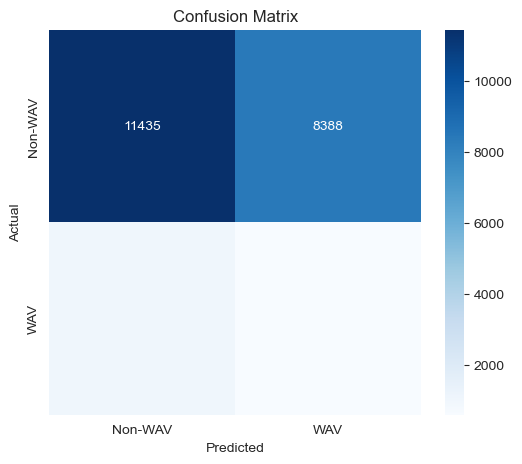

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


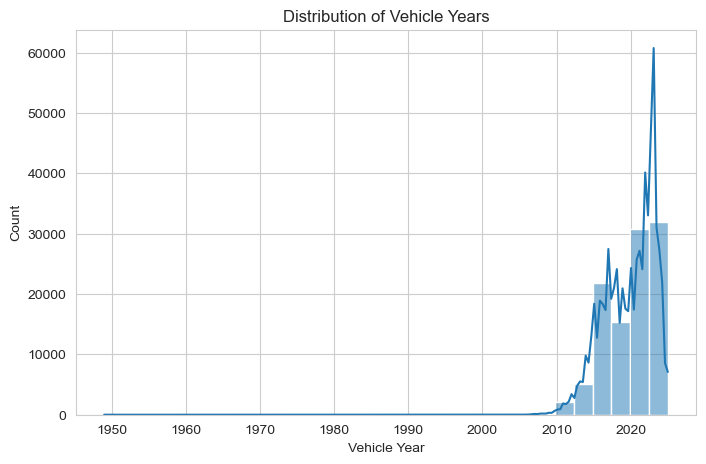

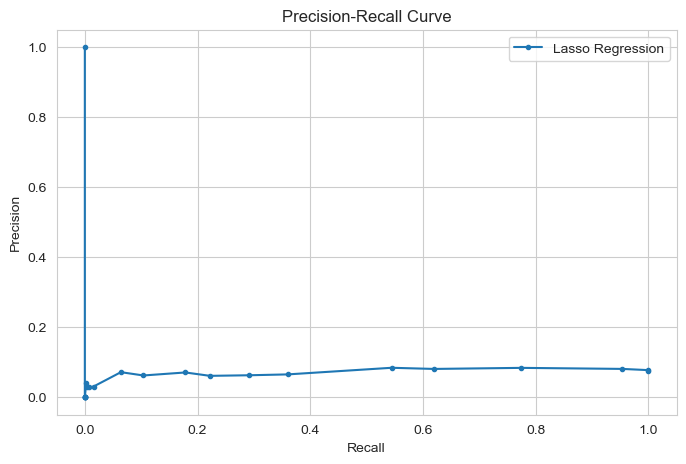

In [91]:
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-WAV', 'WAV'], yticklabels=['Non-WAV', 'WAV'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['Vehicle Year'], bins=30, kde=True)
plt.xlabel('Vehicle Year')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Years')
plt.show()

precision_vals, recall_vals, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,5))
plt.plot(recall_vals, precision_vals, marker='.', label='Lasso Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
